In [1]:
import os
import numpy as np
import pandas as pd 
import random
import cv2
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import plot_model

from os import listdir
from os.path import isfile, join
from PIL import Image
import glob


seed = 2019
np.random.seed(seed)
%matplotlib inline

In [2]:
dirname = 'D:\geoio\Computer Vision Project'
train_path = os.path.join(dirname, 'OCT2017/train')
train_normal_pth = os.path.join(train_path, 'NORMAL')
train_dme_pth = os.path.join(train_path, 'DME')
train_drusen_pth = os.path.join(train_path, 'DRUSEN')
train_cnv_pth = os.path.join(train_path, 'CNV')
    
test_path = os.path.join(dirname, 'OCT2017/test')
test_normal_pth = os.path.join(test_path, 'NORMAL')
test_dme_pth = os.path.join(test_path, 'DME')
test_drusen_pth = os.path.join(test_path, 'DRUSEN')
test_cnv_pth = os.path.join(test_path, 'CNV')
    
val_path = os.path.join(dirname, 'OCT2017/val')
val_normal_pth = os.path.join(val_path, 'NORMAL')
val_dme_pth = os.path.join(val_path, 'DME')
val_drusen_pth = os.path.join(val_path, 'DRUSEN')
val_cnv_pth = os.path.join(val_path, 'CNV')

In [3]:
def plot_imgs(item_dir, num_imgs=4):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:num_imgs]

    plt.figure(figsize=(16, 16))
    for idx, img_path in enumerate(item_files):
        plt.subplot(1, 4, idx+1)

        img = plt.imread(img_path)
        plt.imshow(img, cmap='gray')

    plt.tight_layout()

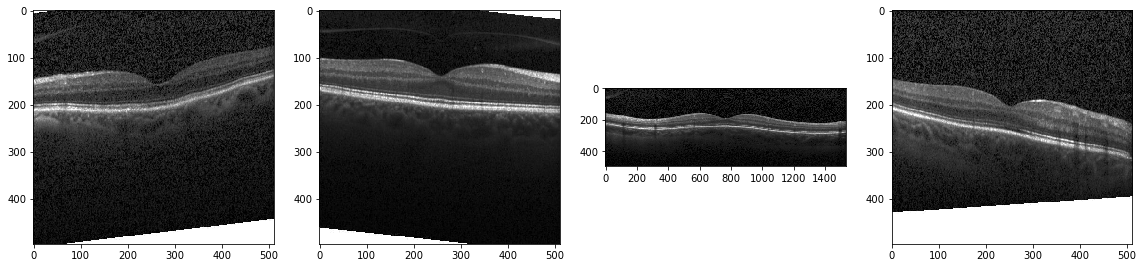

In [10]:
plot_imgs(train_normal_pth)

In [9]:
import Augmentor
p  = Augmentor.Pipeline(train_normal_pth) # or change to the file we need to augment some pictures

Initialised with 26315 image(s) found.
Output directory set to D:\geoio\Computer Vision Project\OCT2017/train\NORMAL\output.

In [21]:
p.rotate(probability=1.0, max_left_rotation=10, max_right_rotation=10) 
p.random_distortion(probability = 1.0, grid_width = 10, grid_height = 10, magnitude = 2)

In [22]:
p.sample(5) # how many 

Processing <PIL.Image.Image image mode=L size=768x496 at 0x24CEB6DE488>: 100%|█████| 5/5 [00:00<00:00, 10.83 Samples/s]


In [23]:
p2 = Augmentor.Pipeline(train_dme_pth)

Initialised with 11348 image(s) found.
Output directory set to D:\geoio\Computer Vision Project\OCT2017/train\DME\output.